In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import the train dataset
train = pd.read_csv('../data/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# lets look at how many people are there in this ship
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [4]:
#information on the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
#Getting useful details from the data frame
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Data Analysis

Let’s begin some exploratory data analysis!

We’ll start by checking out missing data from our data frame and replacing it with useful data.

#### Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

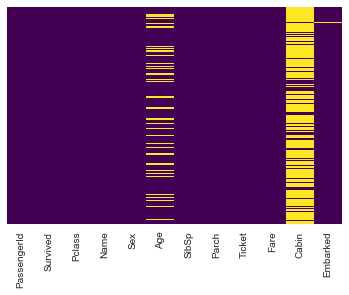

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. 

Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We’ll probably drop this later, or change it to another feature like “Cabin Known: 1 or 0”

### Data visualization

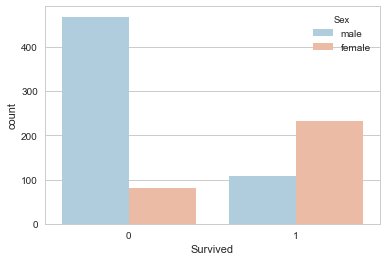

In [7]:
#count-plot of people survided 
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

after looking at this graph we can tell that the people who did not survive were much more likely to be male and people who did survive were almost like twice as likely to be female.

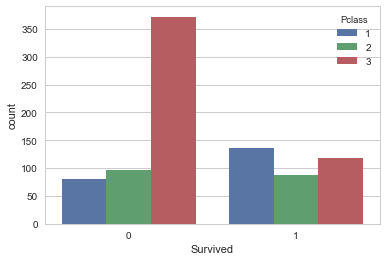

In [8]:
#no. of people who survived according to their Passenger Class
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train)

after looking at this we can tell that people who did not survive were more likely to be belonging to third class i.e the lowest class, the cheapest to get on to and people who did survive were more towards belonging to higher classes

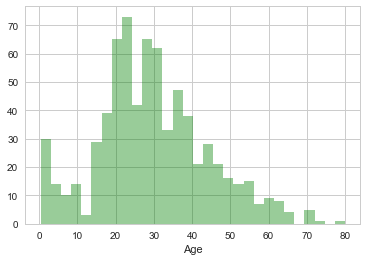

In [9]:
#distribution plot of age of the people
sns.distplot(train['Age'].dropna(), kde=False, bins=30, color='Green')

The average age group of people to survive is somewhere between 20 to 30and as older you get lesser chances of you to have on board.

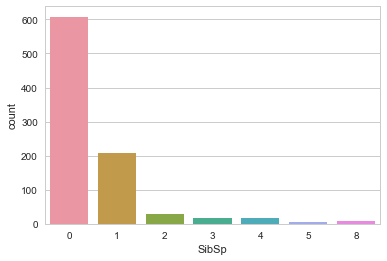

In [10]:
#countplot of the people having siblings or spouce
sns.countplot(x='SibSp',data=train)

looking at this plot we can directly tell that most people on board did not have either children, siblings or spouse on board and the second most popular option is 1which is more likely to be spouse. We have a lot of single people on board, they don’t have spouse or children.

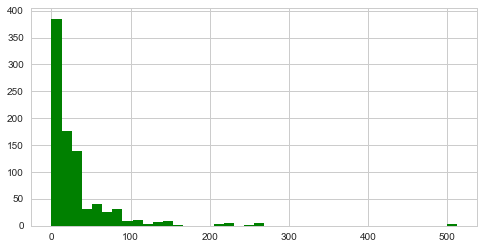

In [11]:
#distribution plot of the ticket fare
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

It looks like most of the purchase prices are between 0 and50, which actually makes sense tickets are more distributed towards cheaper fare prices because most passengers are in cheaper third class

### Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers. However, we can be smarter about this and check the average age by passenger class.

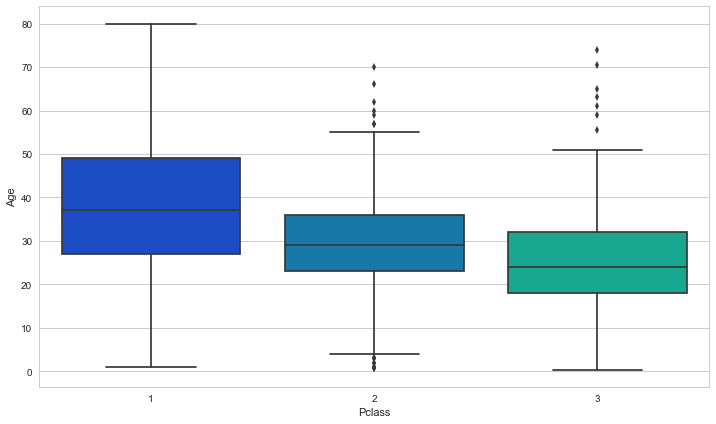

In [12]:
#boxplot with age on y-axis and Passenger class on x-axis.
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We’ll use these average age values to impute based on Pclass for Age.

In [13]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age
      
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

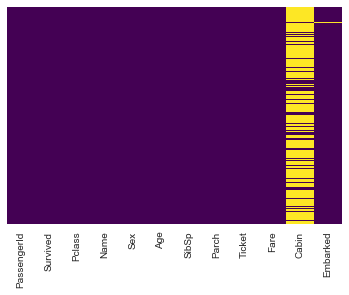

In [14]:
#checking the heatmap again
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
#Now let us go ahead and drop the Cabin column and the row in Embarked that is NaN.
train.drop("Cabin",axis=1,inplace=True)
train.dropna(inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Converting Categorical Features

We’ll need to convert categorical features to dummy variables using pandas! Otherwise, our machine learning algorithm won’t be able to directly take in those features as inputs.


In [16]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
#drop the sex,embarked,name and tickets columns
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
#concatenate new sex and embark column to our train dataframe
train = pd.concat([train,sex,embark],axis=1)
#check the head of dataframe
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


1. Here y is the actual data which we are going to predict, everything else is going to be the features(x).
2. Set the text size to 30 percent and you don’t actually have to set your random state but this is put so if you want your result to match mines exactly.
3. We will use train_test_split from the cross_validation module to split our data. 70%of the data will be training data and %30 will be testing data.


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
           train['Survived'], test_size=0.30, 
            random_state=101)

## Training and Predicting

1. We start by importing the LogisticRegression package from the Linear model family.
 
2. Then create an instance of the logistic regression model and call it log model and then fit the model on the training dataset.

In [18]:
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
#Let’s see how accurate is our model for predictions
#predictions
predictions = logmodel.predict(X_test)
#Now we call some predictions based on the X_test dataset.

## Model Evaluation
We can check precision, recall, f1-score using classification report and also see how accurate is our model for predictions:

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.81      0.93      0.86       163
          1       0.85      0.65      0.74       104

avg / total       0.82      0.82      0.81       267



We got 81% accuracy which is not bad at all.

Let us now see the confusion matrix:
To evaluate our model for some specific values, it can be directly done from our confusion matrix.

In [28]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[151  12]
 [ 36  68]]


From our confusion matrix we conclude that:

True positive: 148(We predicted a positive result and it was positive)

True negative: 68(We predicted a negative result and it was negative)

False positive: 15(We predicted a positive result and it was negative)

False negative: 36(We predicted a negative result and it was positive)

Accuracy = (TP+TN)/total

Accuracy = (148+68)/267 ~ 81%

Error Rate = (FP+FN)/total

Error rate = (36+15)/267 ~19%

## Conclusion:
We now know what the logistic function is and how it is used in logistic regression.

The homogeneity of variance does not need to be always TRUE for the Logistic Regression model.
Logistic Regression uses maximum likelihood estimation (MLE) rather than ordinary least squares (OLS) to estimate the parameters, therefore its predictions depend upon large-sample approximations.

Logistic Regression does not assume a linear relationship between the dependent and the independent variables, but it will assume a linear relationship between the logic of the explanatory variables and the response.

In our tutorial, we have covered a lot of details about Logistic Regression. You have learned what Logistic Regression is, how to build Logistic regression models, how to visualize the results, how to deal with missing data and some of the theoretical background information.

Also, we have covered some basic concepts such as the sigmoid function, confusion matrix, exploratory data analysis, Converting Categorical Features, building logistic regression model.

We still can improve our model, but this tutorial is intended to show how we can do some exploratory analysis, clean up data, and implement logistic regression in python.

[Ref](https://medium.com/@anishsingh20/logistic-regression-in-python-423c8d32838b)